In [167]:
import torch 
import matplotlib.pyplot as plt

In [168]:
a=torch.tensor([1,2,3],dtype=int)

In [169]:
b=torch.tensor([4,5,6],dtype=float)

In [170]:
tensor=torch.tensor([[1,2,3],
                     [4,5,6]])

In [171]:
tensor.ndim
tensor.shape

torch.Size([2, 3])

# 数据生成

In [172]:
torch.ones(2,3)
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [173]:
torch.rand(3,4)

tensor([[0.8284, 0.7947, 0.2967, 0.9302],
        [0.6970, 0.9329, 0.3900, 0.6768],
        [0.8716, 0.9310, 0.0535, 0.0757]])

In [174]:
torch.randint(0,10,(2,3))

tensor([[0, 8, 6],
        [5, 4, 8]])

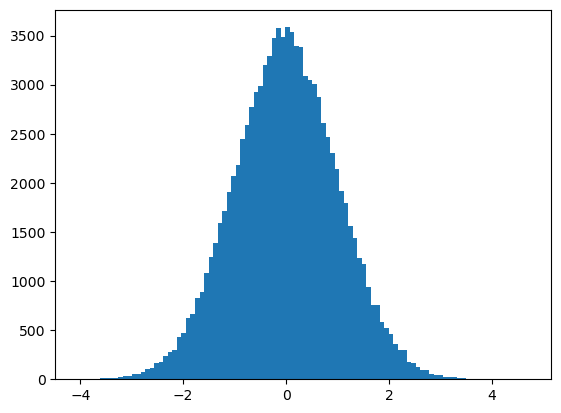

In [175]:
a=torch.randn(1,100000)

plt.hist(a,bins=100)
plt.show()

In [176]:
a=torch.tensor([
    [1,2],
    [3,4],
    [5,6]
])

In [177]:
b=torch.rand_like(a,dtype=float)
b

tensor([[0.0363, 0.5744],
        [0.6254, 0.1018],
        [0.4178, 0.0820]], dtype=torch.float64)

In [178]:
# view相当于reshape
c=a.view(6)
c

tensor([1, 2, 3, 4, 5, 6])

In [179]:
d=b.reshape(6)
d

tensor([0.0363, 0.5744, 0.6254, 0.1018, 0.4178, 0.0820], dtype=torch.float64)

In [180]:
import numpy as np

In [181]:
a=torch.randint(1,5,(2,3))
b=torch.randint(1,5,(2,3))
print(a)
print(b)



tensor([[4, 2, 4],
        [3, 3, 3]])
tensor([[1, 3, 3],
        [1, 2, 3]])


In [182]:
a+b

tensor([[5, 5, 7],
        [4, 5, 6]])

# 任何使张量发生变化的操作都有一个前缀‘_’,例如：a.add_(),b.sub_()

In [183]:
a*b

tensor([[ 4,  6, 12],
        [ 3,  6,  9]])

In [184]:
a/b

tensor([[4.0000, 0.6667, 1.3333],
        [3.0000, 1.5000, 1.0000]])

In [185]:
a%b

tensor([[0, 2, 1],
        [0, 1, 0]])

In [186]:
# 取整
a//b

tensor([[4, 0, 1],
        [3, 1, 1]])

In [187]:
tensor=torch.ones(3,5)
a=a.float()

In [188]:
torch.matmul(a,tensor)

tensor([[10., 10., 10., 10., 10.],
        [ 9.,  9.,  9.,  9.,  9.]])

In [189]:
tensor=torch.arange(2,14)#2到13的有序
print(tensor[1:4])

tensor([3, 4, 5])


In [190]:
x=torch.ones(2,2,requires_grad=True)# 表示这个张量可以计算梯度

In [191]:
y=x+2
z=y*y*3
out=z.mean()
print(out)

tensor(27., grad_fn=<MeanBackward0>)


In [192]:
out.backward()# 这里是对out函数求导
print(x.grad)# 在此时x初值条件下上面被导的out对x的梯度值

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [193]:
from torch import optim
from torch.autograd import Variable
from torch import nn


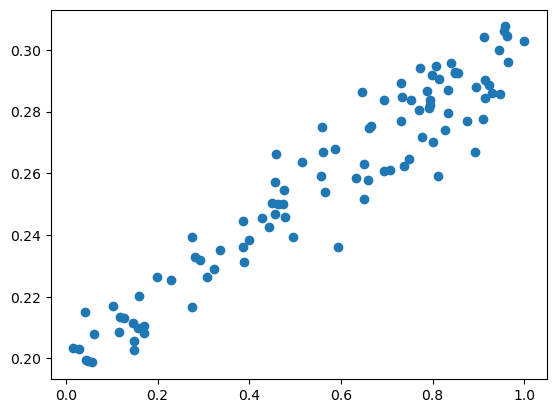

In [194]:
x_data=np.random.rand(100,1)
noise=np.random.normal(0,0.01,x_data.shape)# 正态分布噪声点，均值为0，标准差为0.01
y_data=x_data*0.1+0.2+noise
plt.scatter(x_data,y_data)
plt.show()

In [195]:
x_data=x_data.reshape(-1,1)# -1是指该维度的大小自动调整
y_data=y_data.reshape(-1,1)
x_data=torch.tensor(x_data)
y_data=torch.tensor(y_data)
inputs=Variable(x_data)# pytorch环境下的变量类型
inputs=inputs.float()
output=Variable(y_data)
output=output.float()

In [196]:
# 构建神经网络模型
# 一般把网络中具有学习参数的层放在初始化函数中
class LineaerRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        #初始化父类nn.Module
        super(LineaerRegression,self).__init__()
        self.fc=nn.Linear(1,1)# 线性回归全连接层，参数为输入/输出信号数
    # 定义网络的计算
    def forward(self,x):
        out=self.fc(x)
        return out

In [197]:
# 实例化模型
model=LineaerRegression()
# 定义代价函数
mse_loss=nn.MSELoss()
# 定义优化器
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [198]:
for name,parameters in model.named_parameters():
    print('name:{},parameters:{}'.format(name,parameters))

name:fc.weight,parameters:Parameter containing:
tensor([[-0.2477]], requires_grad=True)
name:fc.bias,parameters:Parameter containing:
tensor([0.0700], requires_grad=True)


In [199]:
# 训练模型
for i in range(1001):
    out=model(inputs)# 每个迭代下模型的预测值
    loss=mse_loss(out,output)# 计算损失值
    # 梯度清0
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200==0:
        print(i)
        print(loss.item())

0
0.11734320968389511
200
0.0001052443403750658
400
8.455352508462965e-05
600
8.442854596069083e-05
800
8.442778926109895e-05
1000
8.442777470918372e-05


In [209]:
params=model.state_dict()
for name,param in params.items():
    print(f'Parameters:{name},Value:{param}')

Parameters:fc.weight,Value:tensor([[0.1023]])
Parameters:fc.bias,Value:tensor([0.1997])


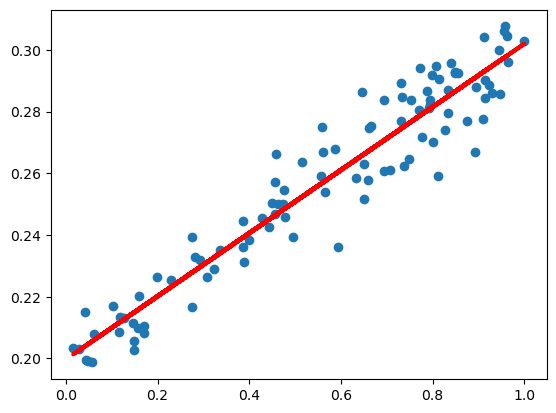

In [210]:
y_pred=model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data,'r-',lw=3)
plt.show()
